In [ ]:
# Task 1: Movie Gerne Classification

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
movie_test=pd.read_csv(r'C:\Machine Learning Intership\Genre Classification Dataset\test_data.txt',sep=":::",engine='python')
movie_train=pd.read_csv(r'C:\Machine Learning Intership\Genre Classification Dataset\train_data.txt',sep=":::",engine='python')

In [3]:
movie_test.head()

,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa."
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),Before he was known internationally as a mart...
4,6,Riddle Room (2016),Emily Burns is being held captive in a room w...


In [4]:
movie_test.describe()

,1
count,54199.000000
mean,27101.000000
std,15646.047957
min,2.000000
25%,13551.500000
50%,27101.000000
75%,40650.500000
max,54200.000000


In [6]:
movie_test.columns=['SN','movie_name','description']

In [7]:
movie_test.head()

,SN,movie_name,description
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),Before he was known internationally as a mart...
4,6,Riddle Room (2016),Emily Burns is being held captive in a room w...


In [8]:
movie_train.head()

,1,Oscar et la dame rose (2009),drama,"Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue."
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [9]:
movie_train.describe()

,1
count,54213.000000
mean,27108.000000
std,15650.089409
min,2.000000
25%,13555.000000
50%,27108.000000
75%,40661.000000
max,54214.000000


In [10]:
movie_train.columns=['SN','movie_name','category','description']

In [11]:
movie_train.head()

,SN,movie_name,category,description
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


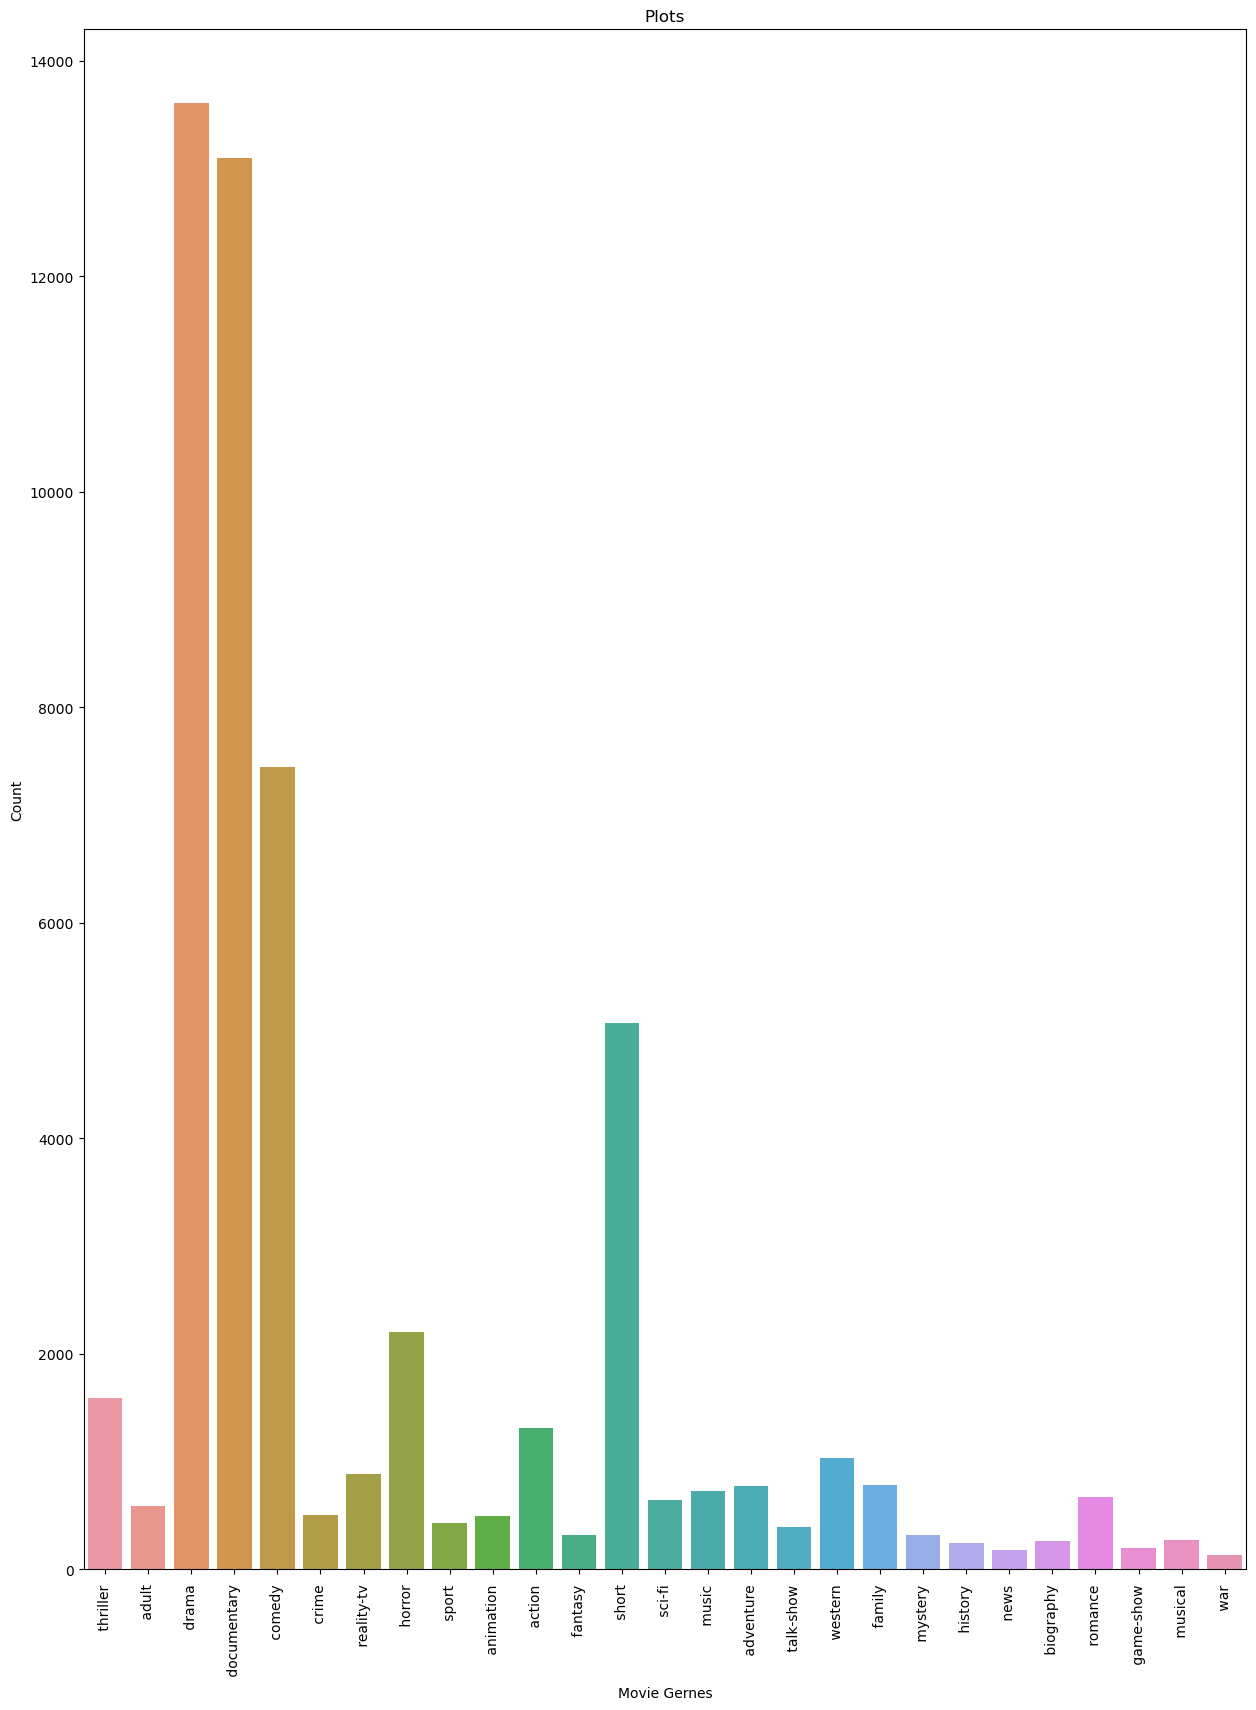

In [12]:
plt.figure(figsize=(15,20))
sns.countplot(x='category',data=movie_train)
plt.xlabel('Movie Gernes')
plt.ylabel('Count')
plt.title('Plots')
plt.xticks(rotation=90);
plt.show()

In [13]:
movie_combined=pd.concat([movie_test,movie_train],axis=1)

In [14]:
movie_combined.head()

,SN,movie_name,description,SN,movie_name,category,description
0,2.0,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3.0,Off the Beaten Track (2010),One year in the life of Albin and his family ...,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4.0,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5.0,Er nu zhai (1955),Before he was known internationally as a mart...,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6.0,Riddle Room (2016),Emily Burns is being held captive in a room w...,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [15]:
movie_combined.shape

(54213, 7)

In [16]:
vectorizer=TfidfVectorizer()

In [17]:
X=vectorizer.fit_transform(movie_combined["category"])
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
y=movie_combined['category']

In [19]:
X.shape

(54213, 30)

In [22]:
y.shape

(54213,)

In [23]:
movie_combined.count()

SN             54199
movie_name     54199
description    54199
SN             54213
movie_name     54213
category       54213
description    54213
dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
from sklearn.naive_bayes import MultinomialNB
nb_model=MultinomialNB()
nb_model.fit(X_train,y_train)
y_pred_nb=nb_model.predict(X_test)
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred_nb))
print("classification report:\n",classification_report(y_test,y_pred_nb))
print("Accuracy:",accuracy_score(y_test,y_pred_nb))

confusion_matrix:
 [[ 259    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0  115    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0  153    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0  105    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0   43    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 1479    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0  115    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 

In [27]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))

confusion_matrix:
 [[ 259    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0  115    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0  153    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0  105    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0   43    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 1479    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0  115    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 

In [28]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))

confusion_matrix:
 [[ 259    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0  115    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0  153    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0  105    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0   43    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 1479    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0  115    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 